In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
from discretize.utils import meshutils
import inspect
from SimPEG import Utils, Mesh
import matplotlib.pyplot as plt

In this example, we demonstrate different mesh refinement strategies available for TreeMesh under the Utils.
First let's define a simple ground survey and topography.

In [73]:
# Define a simple Gaussian topography
[xx, yy] = np.meshgrid(np.linspace(-100,100,11), np.linspace(-100,100,11))
b = 50
A = 105
zz = A*np.exp(-1*((xx/b)**2. + (yy/b)**2.))

topo = np.c_[xx.reshape(-1), yy.reshape(-1), zz.reshape(-1)]

xx = np.linspace(-100,100,11)
b = 50
A = 100
zz = A*np.exp(-1*((xx/b)**2.))

topo2D = np.c_[xx, zz]

print(topo.shape)

(121, 3)


# Create 3D tensor

In [74]:
meshBox = meshutils.mesh_builder_xyz(topo, [5, 5, 5], 
                                  padding_distance=[[0,0], [300,0], [0,100]],
                                  mesh_type="TREE")

meshBox = meshutils.refine_tree_xyz(meshBox, topo, method='box', finalize=True)


meshRad = meshutils.mesh_builder_xyz(topo, [5, 5, 5], 
                                  padding_distance=[[0,0], [300,0], [0,100]],
                                  mesh_type="TREE")

meshRad = meshutils.refine_tree_xyz(meshRad, topo, method='radial', octree_levels=[2], finalize=True)


meshSurf = meshutils.mesh_builder_xyz(topo, [5, 5, 5], 
                                  padding_distance=[[0,0], [300,0], [0,100]],
                                  mesh_type="TREE")

meshSurf = meshutils.refine_tree_xyz(meshSurf, topo, method='surface', finalize=True)



<IPython.core.display.Javascript object>


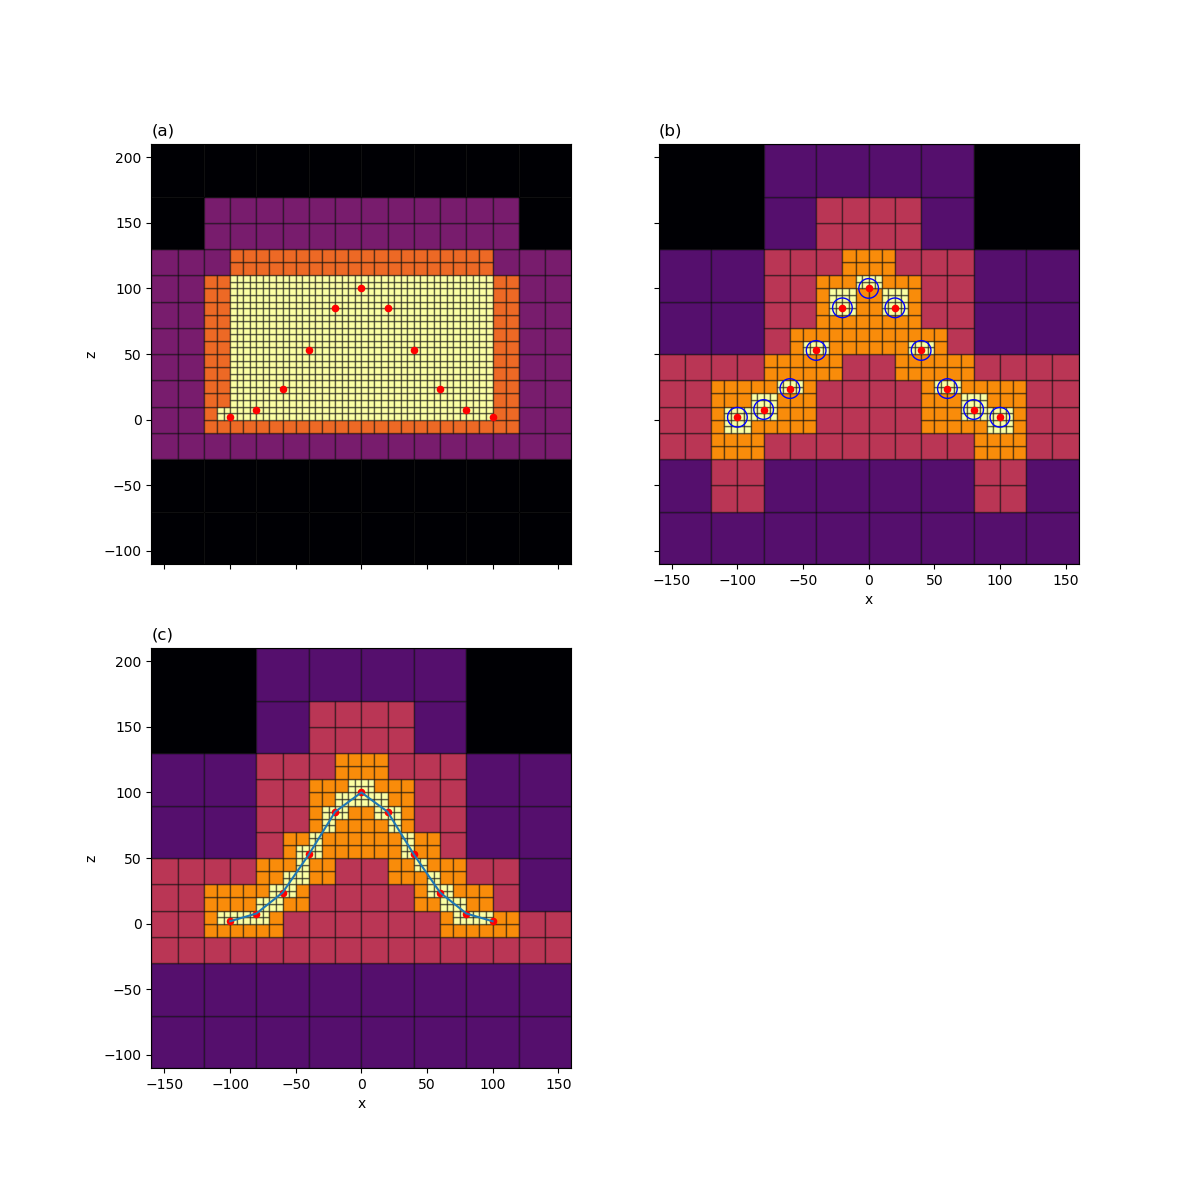

In [79]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(2,2,1)
meshBox.plotSlice(np.log10(meshBox.vol), grid=True, normal='Y', pcolorOpts={"cmap":'inferno_r'}, ax=ax1)
ax1.scatter(topo2D[:,0], topo2D[:,1], 20, color='r')
ax1.set_title('(a)', loc= 'left')
ax1.set_title('', loc= 'center')
ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.set_aspect('equal')

ax2 = plt.subplot(2,2,2)
meshRad.plotSlice(np.log10(meshRad.vol), grid=True, normal='Y', ax=ax2, pcolorOpts={"cmap":'inferno_r'})
ax2.scatter(topo2D[:,0], topo2D[:,1], 20, color='r')
ax2.scatter(topo2D[:,0], topo2D[:,1], 200, color='b', marker='o', facecolors='none')
ax2.set_title('(b)', loc= 'left')
ax2.set_title('', loc= 'center')
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.set_aspect('equal')

ax3 = plt.subplot(2,2,3)
meshSurf.plotSlice(np.log10(meshSurf.vol), grid=True, normal='Y', ax=ax3, pcolorOpts={"cmap":'inferno_r'})
ax3.plot(topo2D[:,0], topo2D[:,1])
ax3.scatter(topo2D[:,0], topo2D[:,1], 20, color='r')
ax3.set_title('(c)', loc= 'left')
ax3.set_title('', loc= 'center')
ax3.set_aspect('equal')

# Create 3D OcTree

700.0 5
400.0 5
149.44677142205342 5


<IPython.core.display.Javascript object>


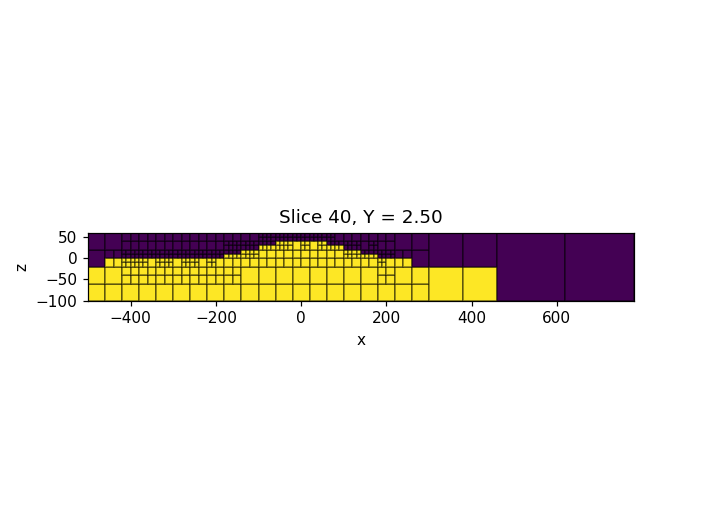

In [5]:
mesh = meshutils.mesh_builder_xyz(topo, [5, 5, 5], 
                                  depth_core=100, 
                                  padding_distance=[[100,0], [0,0], [0,0]], 
                                  mesh_type='TREE',
)

mesh = meshutils.refine_tree_xyz(mesh, topo, finalize=True)

actv = Utils.surface2ind_topo(mesh, topo)

mesh.plotSlice(actv, grid=True, normal='Y', ind=int(np.searchsorted(mesh.vectorCCy, 0)))
mesh.x0

plt.gca().set_aspect('equal')


# Create 2D OcTree

<IPython.core.display.Javascript object>


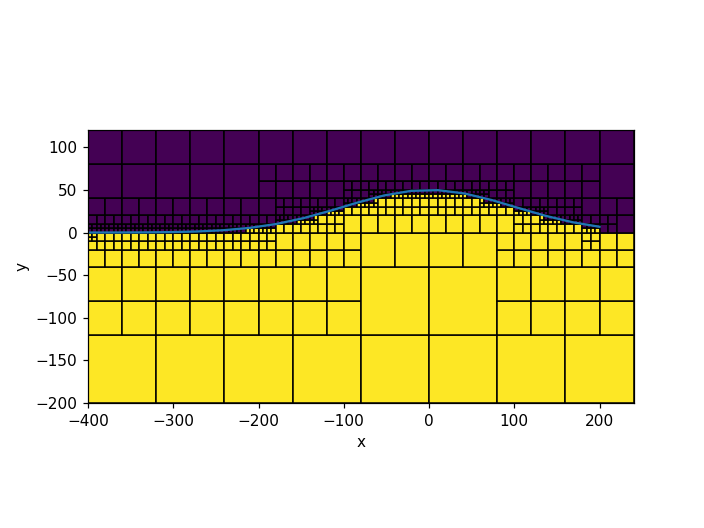

600.0 5
299.70698447929914 5


In [9]:
fig = plt.figure()



axs = plt.subplot()
mesh = meshutils.mesh_builder_xyz(topo2D, [5, 5, 5], 
                                  depth_core=100, 
                                  padding_distance=[[0,0], [100,50]], 
                                  mesh_type='TREE',
)

# mesh.refine(5, finalize=True)
mesh = meshutils.refine_tree_xyz(mesh, topo2D,method='surface', finalize=True)

actv = Utils.surface2ind_topo(mesh, topo2D,  gridLoc='N',fill_value = 'extrapolate')

mesh.plotImage(actv, grid=True, normal='Y', ax=axs)

plt.plot(topo2D[:,0], topo2D[:,1])

# mesh.x0
plt.gca().set_aspect('equal')
plt.show()


In [36]:
2**9



512